# Code pour créer un diagramme permettant de visualiser les positions de pays en fonction de 2 paramètres 
## (ici le pourcentage d'utilisateurs d'internet dans la population du pays et l'empreinte écologique du pays)

### Importer les bibliothèques nécessaires

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Créer les listes (vides) des pays et des deux paramètres

### la liste de données pour les abscisses est le pourcentage d'utilisateurs d'internet dans la population du pays (en % de la population totale)

source des données : https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users

### la liste de données pour les ordonnées est l'empreinte écologique du pays (en hag/hab)

source des données : https://data.footprintnetwork.org/#/
=> cliquer sur la catégorie "Ecological Footprint Per Person" pour voir les données

In [2]:
# liste des pays
pays = []
# liste du pourcentage d'utilisateurs d'internet dans la population du pays
internet_users = []
# liste de l'empreinte écologique du pays
empreinte_eco = []

### Définir une fonction qui permet d'entrer un pays et les valeurs des 2 paramètres associés

In [3]:
# fonction qui prend comme paramètres, dans l'ordre, le nom du pays (chaîne de caractères), le pourcentage d'utilisateurs d'internet dans la population du pays (en % de la population totale) et l'empreinte écologique du pays (en hag/hab)

def inserer_pays(nom_pays, internet_users_pays, empreinte_eco_pays) :
    
    pays_deja_present = 0
    indice_pays_deja_present = 0

    for i in range(len(pays)) :
            if nom_pays == pays[i] :
                pays_deja_present = 1
                indice_pays_deja_present = i
                
    if pays_deja_present == 1 :
        pays[indice_pays_deja_present] = nom_pays
        internet_users[indice_pays_deja_present] = internet_users_pays
        empreinte_eco[indice_pays_deja_present] = empreinte_eco_pays
    else :
        pays.append(nom_pays)
        internet_users.append(internet_users_pays)
        empreinte_eco.append(empreinte_eco_pays)

### Définir une fonction qui permet d'enlever un pays de la liste ainsi que les valeurs associées de ses 2 paramètres dans leurs listes respectives

In [4]:
# fonction qui prend comme paramètre le nom du pays que l'on veut supprimer

def supprimer_pays(nom_pays) :
    
    pays_voulu_present = 0
    indice_pays_voulu = 0
    
    for i in range(len(pays)) :
            if nom_pays == pays[i] :
                pays_voulu_present = 1
                indice_pays_voulu = i
                
    if pays_voulu_present == 1 :
        print('suppression : %s, %.2f, %.2f' % (pays[indice_pays_voulu], internet_users[indice_pays_voulu], empreinte_eco[indice_pays_voulu]))
        pays.remove(pays[indice_pays_voulu])
        internet_users.remove(internet_users[indice_pays_voulu])
        empreinte_eco.remove(empreinte_eco[indice_pays_voulu])
        
        
    else : print('pays non trouvé dans la liste')

## Remplir les lites en utilisant la fonction

In [5]:
inserer_pays('France',89.3,4.6)

In [6]:
inserer_pays('Chine',69.3,3.7)

In [7]:
inserer_pays('USA',96.3,8.0)

In [8]:
inserer_pays('Somalie',2.0,0.9)

In [9]:
inserer_pays('Haiti',12.3,0.6)

In [10]:
inserer_pays('Nepal',34.4,1.1)

In [11]:
inserer_pays('Inde',55.3,1.2)

In [12]:
inserer_pays('Mongolie',23.7,8.0)

In [13]:
inserer_pays('Indonesie',79.6,1.7)

In [14]:
inserer_pays('Qatar',95.9,14.7)

In [15]:
inserer_pays('Bolivie',43.8,3.1)

In [16]:
supprimer_pays('Luxembourg')

pays non trouvé dans la liste


### Vérifier le remplissage des listes

In [17]:
print(pays)
print(internet_users)
print(empreinte_eco)
print(len(pays))
print(len(internet_users))
print(len(empreinte_eco))

['France', 'Chine', 'USA', 'Somalie', 'Haiti', 'Nepal', 'Inde', 'Mongolie', 'Indonesie', 'Qatar', 'Bolivie']
[89.3, 69.3, 96.3, 2.0, 12.3, 34.4, 55.3, 23.7, 79.6, 95.9, 43.8]
[4.6, 3.7, 8.0, 0.9, 0.6, 1.1, 1.2, 8.0, 1.7, 14.7, 3.1]
11
11
11


### Définir le nombre de pays pris en compte et le stocker dans une variable

In [18]:
nb_pays = len(pays)

### Tracer le graphe

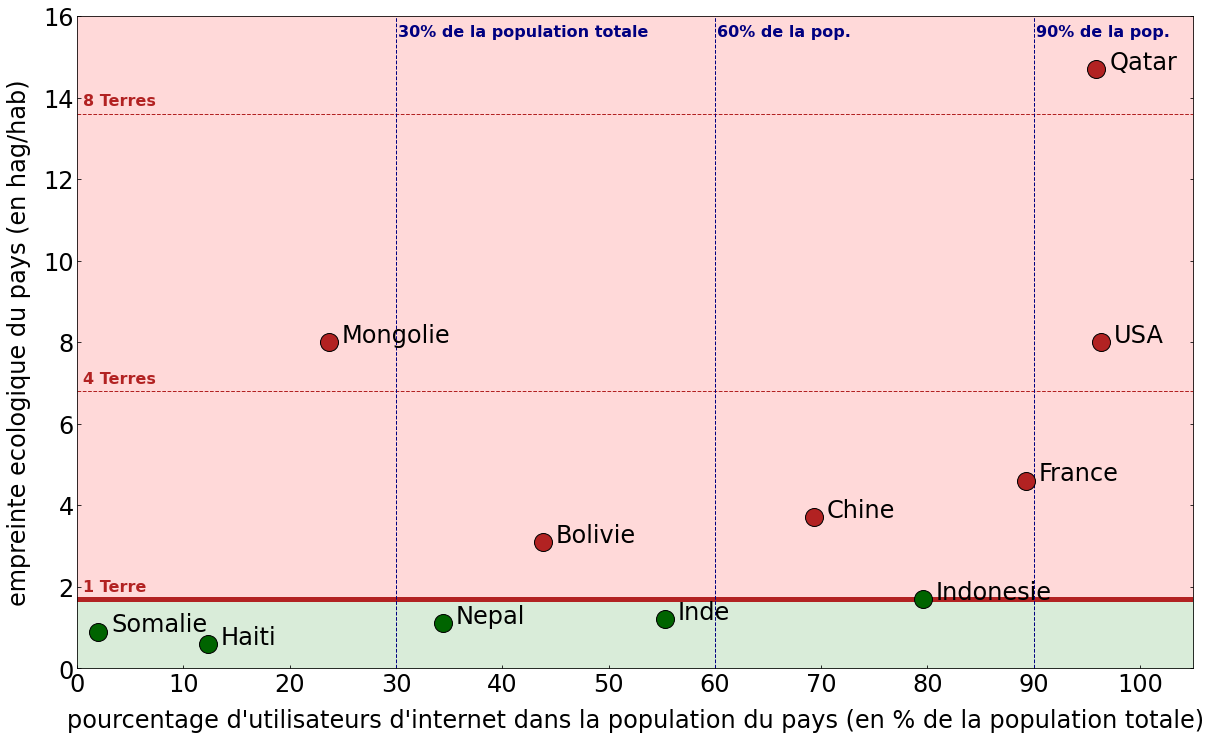

In [19]:
fig, ax=plt.subplots(figsize=(20, 12))

# définir des zones
# tracer des lignes horizontales
ax.axhline(1.7, color='firebrick', linestyle='-', linewidth=5)
ax.axhline(4*1.7, color='firebrick', linestyle='--', linewidth=1)
ax.axhline(8*1.7, color='firebrick', linestyle='--', linewidth=1)
# tracer des lignes verticales
ax.axvline(30,color='navy', linestyle='--', linewidth=1)
ax.axvline(60,color='navy', linestyle='--', linewidth=1)
ax.axvline(90,color='navy', linestyle='--', linewidth=1)

# annoter ces lignes
plt.annotate('1 Terre', color='firebrick', fontsize=16, fontweight='bold', xy=(0.5,1.9), xytext=(0.5,1.9))
plt.annotate('4 Terres', color='firebrick', fontsize=16, fontweight='bold', xy=(0.5,7), xytext=(0.5,7))
plt.annotate('8 Terres', color='firebrick', fontsize=16, fontweight='bold', xy=(0.5,13.8), xytext=(0.5,13.8))

plt.annotate('30% de la population totale', color='navy', fontsize=16, fontweight='bold', xy=(30,15.5), xytext=(30.2,15.5))
plt.annotate('60% de la pop.', color='navy', fontsize=16, fontweight='bold', xy=(60,15.5), xytext=(60.2,15.5))
plt.annotate('90% de la pop.', color='navy', fontsize=16, fontweight='bold', xy=(90,15.5), xytext=(90.2,15.5))


# tracer les points
for i in range(nb_pays) : # boucle pour tracer les points pays par pays
    if empreinte_eco[i]>1.7 : # condition pour afficher les pays d'une certaines couleur
        ax.plot(internet_users[i], empreinte_eco[i], 'o', markersize=18, markerfacecolor='firebrick', markeredgecolor='black')
    else :
        ax.plot(internet_users[i], empreinte_eco[i], 'o', markersize=18, markerfacecolor='darkgreen', markeredgecolor='black')

    #if pays[i] in ['Chine', 'Somalie', 'Haiti', 'Nepal', 'Qatar', 'Bolivie']:
    plt.annotate(f'{pays[i]}', color='black', fontsize=24, xy=(internet_users[i],empreinte_eco[i]), xytext=(internet_users[i]+1.2,empreinte_eco[i]))
        # annotate permet d'écrire du texte sur un graphique, ici le nom du pays associé à chaque point (x,y)

# nom des axes, taille de la police et espacement de nom par rapport à l'axe
plt.xlabel('pourcentage d\'utilisateurs d\'internet dans la population du pays (en % de la population totale)',fontsize=24, labelpad=12)
plt.ylabel('empreinte ecologique du pays (en hag/hab)',fontsize=24, labelpad=12)

# taille et style des axes
ax.tick_params(labelsize=24)
ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

ax.set_xticks(np.arange(0,100+10,10)) # met les graduations tous les 10% sur l'axe des x

y_terre = 1.7 # valeur de référence pour 1 Terre
y_max = 16 # valeur maximale du graphique en ordonnée

# limite du tracé en x et en y
plt.xlim(0,105)
plt.ylim(0,y_max)


# definir les zones colorées en arrière-plan
# définir une frontière dans le diagramme
x = np.arange(0,105+105/(nb_pays+1),105/(nb_pays-1))
y0 = x-x
y1 = x-x+y_terre
y2 = x-x+y_max
# colorier les zones
ax.fill_between(x,y0,y1, color='green', alpha=0.15)
ax.fill_between(x,y1,y2, color='red', alpha=0.15)


# sauvegarder le graphe au format pdf
plt.savefig('./diagramme_pays_complet.pdf', bbox_inches='tight')